# 04. PyTorch Custom Datasets

We've used some datasets with PyTorch before.

But how do you get your own data into PyTorch?

One of the ways to do so is via: custom dataset

## Domain libraries

Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions.

## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# Note: PyTorch 1.10.0 + is required for this course
torch.__version__

'2.1.2'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get data

Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the image (~75 training, 25 testing).

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("Data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)

Data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


## 2. Becoming one with the data (data preparation and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its content."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'Data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'Data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'Data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'Data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'Data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'Data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'Data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'Data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'Data/pizza_steak_sushi/train/sushi'.


In [5]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('Data/pizza_steak_sushi/train'),
 PosixPath('Data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.patent.stem`
4. Since we're working with image, let's open the image with Python's PIL
5. We'll then show the image and print metadata

Random image path: Data/pizza_steak_sushi/test/pizza/344397.jpg
Image class: pizza
Image height: 342
Image width: 512


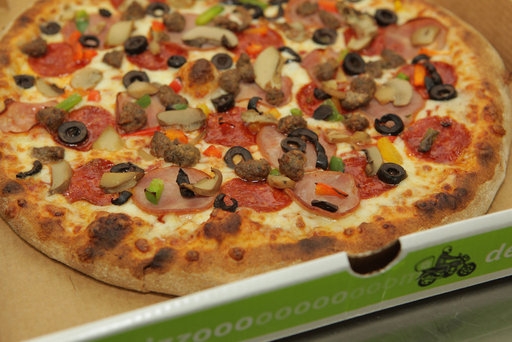

In [20]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get the image class from the path name (the image class is the name of directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 341.5, -0.5)

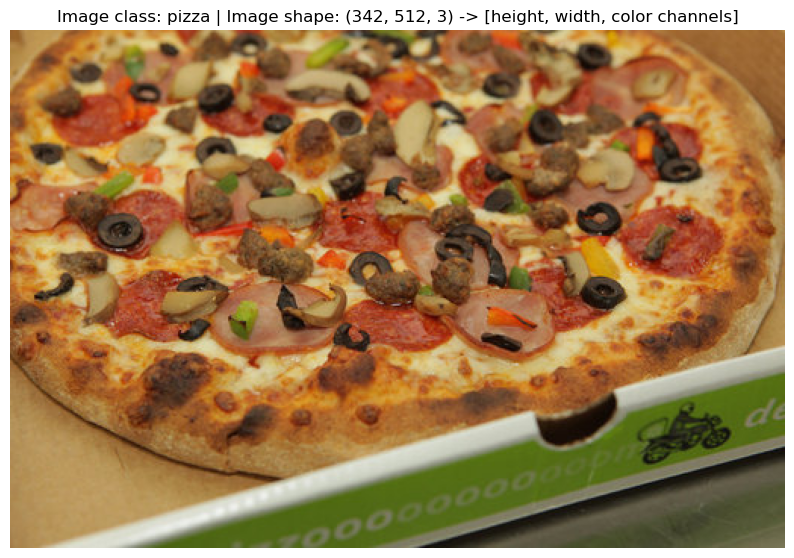

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False)

In [22]:
img_as_array

array([[[150,  97,  43],
        [151,  98,  44],
        [155, 100,  44],
        ...,
        [167, 121,  61],
        [176, 130,  68],
        [184, 140,  77]],

       [[151,  98,  44],
        [152,  99,  45],
        [155, 100,  44],
        ...,
        [163, 114,  55],
        [167, 121,  59],
        [174, 128,  66]],

       [[152,  99,  45],
        [152,  99,  45],
        [153, 101,  44],
        ...,
        [160, 111,  52],
        [162, 113,  54],
        [164, 118,  58]],

       ...,

       [[165, 125,  74],
        [168, 128,  77],
        [170, 133,  80],
        ...,
        [119, 116,  85],
        [119, 116,  85],
        [119, 116,  85]],

       [[163, 123,  72],
        [166, 126,  75],
        [168, 131,  78],
        ...,
        [120, 117,  86],
        [121, 118,  87],
        [121, 118,  87]],

       [[162, 122,  71],
        [165, 125,  74],
        [167, 130,  77],
        ...,
        [121, 118,  87],
        [122, 119,  88],
        [122, 119,  88]]